# Importing libraries

In [1]:
import numpy as np
import skfuzzy as fuzz
import gymnasium as gym
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl

# تعریف متغیر های زبانی
1. مکان افقی
2. مکان عمودی
3. سرعت چرخش
4. نیرو گشتاور

### نحوه تعریف متغیر مکان افقی: 
1.  چپ : 
(-1 , 0.25)
2. راست :
(-0.25 , 1)

c:\Users\Rezapour\AppData\Local\Programs\Python\Python311\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


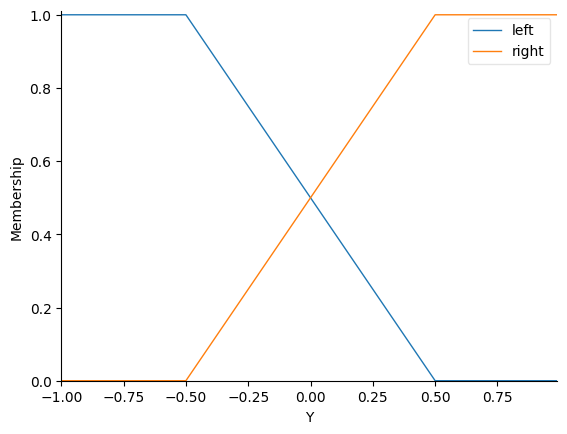

In [2]:
Y = ctrl.Antecedent(np.arange(-1 , 1 , 0.01) , 'Y')
Y['left'] = fuzz.trapmf(Y.universe , [-1 , -1 , -0.5 , 0.5])
Y['right'] = fuzz.trapmf(Y.universe , [-0.5 , 0.5, 1 , 1])
Y.view()

### نحوه تعریف متغیر مکان عمودی:
1.  پایین : 
(-1 , 0.25)
2. بالا : 
(-0.25 , 1)

c:\Users\Rezapour\AppData\Local\Programs\Python\Python311\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


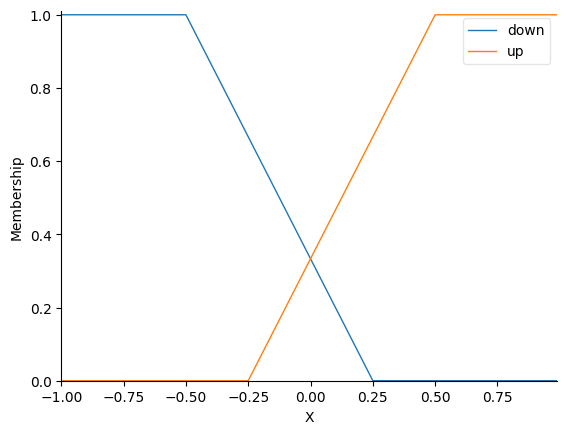

In [3]:
X = ctrl.Antecedent(np.arange(-1 , 1 , 0.01) , 'X')
X['down'] = fuzz.trapmf(X.universe , [-1 , -1 , -0.5 , 0.25])
X['up'] = fuzz.trapmf(X.universe , [-0.25 , 0.5, 1 , 1])
X.view()

### نحوه تعریف متغیر سرعت:
1. پادساعتگرد : 
(-8 , 1)
2. ساعتگرد : 
(-1 , 8)

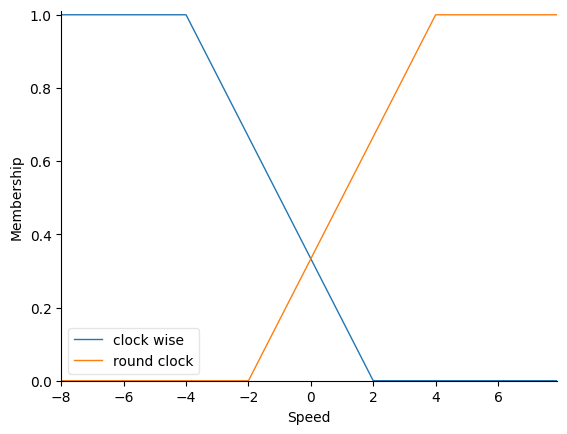

In [4]:
Speed = ctrl.Antecedent(np.arange(-8 , 8 , 0.1) , 'Speed')
Speed['clock wise'] = fuzz.trapmf(Speed.universe , [-8 , -8 , -4 , 2])
Speed['round clock'] = fuzz.trapmf(Speed.universe , [-2 , 4, 8 , 8])
Speed.view()

### نحوه تعریف متغیر نیرو گشتاور:
1. پادساعتگرد  : 
(-2 , 0.5)
2. ساعتگرد : 
(-0.5 , 2)

c:\Users\Rezapour\AppData\Local\Programs\Python\Python311\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


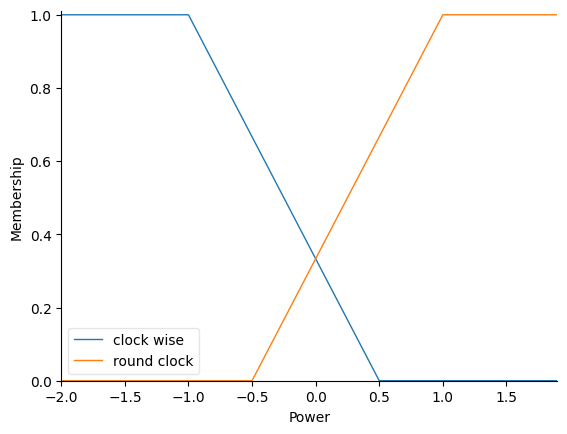

In [10]:
Power = ctrl.Consequent(np.arange(-2 , 2 , 0.1) , 'Power')
Power['clock wise'] = fuzz.trapmf(Power.universe , [-2 , -2 , -1 , 0.5])
Power['round clock'] = fuzz.trapmf(Power.universe , [-0.5 , 1, 2 , 2])
Power.view()

# تعریف قوانین

1. اگر پایین و چپ و سرعت پادساعتگرد باشد باید نیرو پادساعتگرد باشد.
2. اگر  پایین و چپ و سرعت ساعتگرد باشد باید نیرو ساعتگرد باشد.
3. اگر پایین و راست و سرعت پادساعتگرد باشد باید نیرو پادساعتگرد باشد.
4. اگر پایین و راست و ساعتگرد باشد باید نیرو ساعتگرد باشد.
5. اگر بالا و چپ و سرعت پادساعتگرد باشد باید نیرو ساعتگرد باشد.
6. اگر بالا و چپ و سرعت ساعتگرد باشد باید نیرو پادساعتگرد باشد.
7. اگر بالا و راست و سرعت پادساعتگرد باشد باید نیرو ساعتگرد باشد.
8. اگر بالا و راست و سرعت ساعتگرد باشد باید نیرو پادساعتگرد باشد.

In [11]:
rule1 = ctrl.Rule(Y['left'] & X['down'] & Speed['clock wise'] , Power['clock wise'])
rule2 = ctrl.Rule(Y['left'] & X['down'] & Speed['round clock'] , Power['round clock'])
rule3 = ctrl.Rule(Y['right'] & X['down'] & Speed['clock wise'] , Power['clock wise'])
rule4 = ctrl.Rule(Y['right'] & X['down'] & Speed['round clock'] , Power['round clock'])
rule5 = ctrl.Rule(Y['left'] & X['up'] & Speed['clock wise'] , Power['round clock'])
rule6 = ctrl.Rule(Y['left'] & X['up'] & Speed['round clock'] , Power['clock wise'])
rule7 = ctrl.Rule(Y['right'] & X['up'] & Speed['clock wise'] , Power['round clock'])
rule8 = ctrl.Rule(Y['right'] & X['up'] & Speed['round clock'] , Power['clock wise'])
controller = ctrl.ControlSystem([rule1, rule2, rule3, rule4 , rule5 , rule6 , rule7 , rule8])
simulator = ctrl.ControlSystemSimulation(controller)


# تمرین بازی

In [13]:
env = gym.make("Pendulum-v1", render_mode="human")
rewards = []
observation, _ = env.reset()
for _ in range(500):
    simulator.input['X'] = observation[0]
    simulator.input['Y'] = observation[1]
    simulator.input['Speed'] = observation[2]

    simulator.compute()
    decision = simulator.output['Power']

    observation, reward, terminated, truncated, info = env.step([decision])
    if observation[0] > 0.99 and abs(observation[2]) < 1.5 :
        terminated = True
    rewards.append(reward)
    env.render()
    
    if terminated:
        print(f'You Win in {_} iteration!')
        break

env.close()

You Win in 120 iteration!


# نمودار پاداش های دریافتی

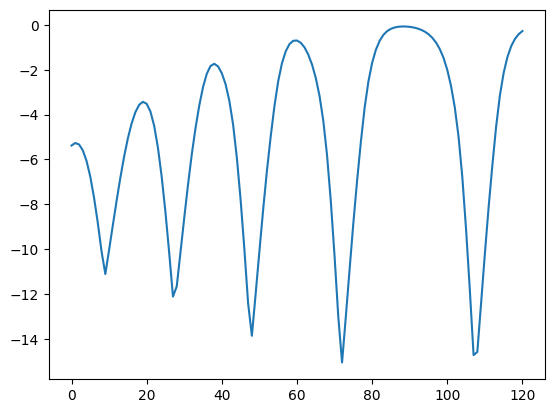

In [15]:
fig, ax = plt.subplots()
ax.plot(range(len(rewards)) , rewards)

### تحلیل نمودار 
همانطور که می توان از نمودار مشاهده کرد ابتدا از یک نفطه رندوم شروع به حرکت شده و سپس سعی شده که با استفاده از سرعت و نیروی گشتاور با توجه به قانون های تعریف شده به پاداش مورد هدف نزدیک تر شده . 
و از طرفی می توان دید که هرقدر رو به جلو می رویم پاداش های دریافتی بهتر و گرفتن پاداش های بهتر در مدت طولانی تری انجام می شود.